# **Neural networks from scratch**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
np.set_printoptions(precision=2, suppress=True)

In [2]:
a0 = 10
a1 = -4
a2 = 0.7
a3 = 1

p = Polynomial([a0, a1, a2, a3])

display(p)

Polynomial([10. , -4. ,  0.7,  1. ], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [3]:
xx = np.linspace(-5, 5, 1000)
s = 12

yy = p(xx) + np.random.normal(0, s, size=xx.shape)

X_train, X_test, y_train, y_test = train_test_split(
    xx, yy, test_size=0.2, random_state=42
)

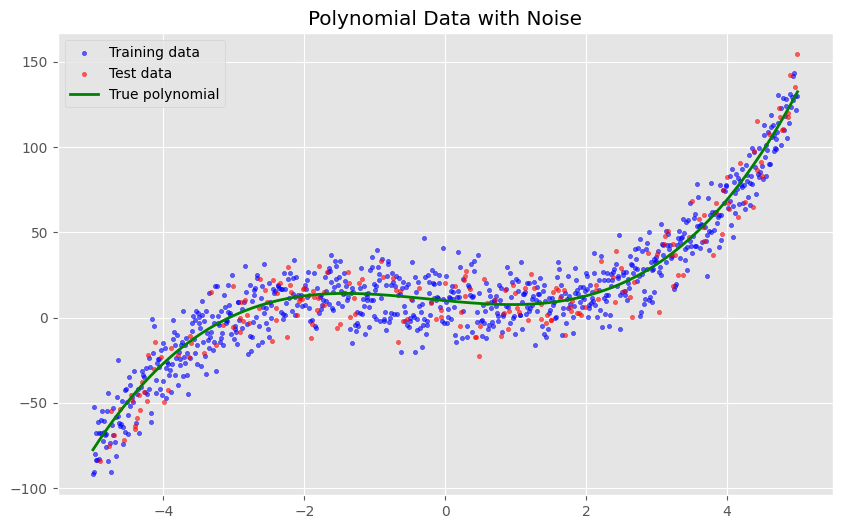

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.6, marker="."
)
plt.scatter(X_test, y_test, color="red", label="Test data", alpha=0.6, marker=".")
plt.plot(xx, p(xx), color="green", label="True polynomial", linewidth=2)
plt.title("Polynomial Data with Noise")
plt.legend()
plt.show()

## **Network Architecture**

We wll be working with the following neural network architecture:

- Input Layer: 1 neurons (a single feature)
- Hidden Layer: 2 neurons (with ReLU activation)
- Output Layer: 1 neuron (for regression output)

<div align="center">
<img src="../images/basic-structure.png" alt="Neural Network Architecture" width="400"/>
<img src="../images/basic-structure-with-activation.png" alt="Neural Network Architecture with Activation" width="460"/>
</div>

The input layer consists of our features:

$$
l_{ij}^{(1)} = x_{ij}^{(1)} \in \mathbb{R}^{n \times 1}, \quad i=1,\ldots,n \text{ (observations)}, \quad j=1 \text{ (features)}
$$

The second layer with 2 neurons computes the weighted sum:

$$
z_{ij}^{(2)} = z_{ik}^{(1)} w_{kj}^{(2)} + b_j^{(2)}, \quad k=1, \quad j=1,2
$$

$$
z_{ij}^{(2)} = z_{i1}^{(1)} w_{1j}^{(2)} + b_j^{(2)} \longrightarrow l_{ij}^{(2)} = \xi(l_{i1}^{(1)} w_{1j}^{(2)} + b_j^{(2)}) \in \mathbb{R}^{n \times 2}, \quad j=1,2
$$

The output layer with a single neuron (and no activation) computes:

$$
z_{ij}^{(3)} =  z_{ik}^{(2)} w_{kj}^{(3)} + b_{j}^{(3)}, \quad k=1,2
$$

$$
z_{ij}^{(3)} = z_{i1}^{(2)} w_{1j}^{(3)} + z_{i2}^{(2)} w_{2j}^{(3)} + b_{j}^{(3)} \in \mathbb{R}^{n \times 1}, \quad j=1
$$


l1 shape: (1000, 1)
l2 shape: (1000, 2)
l3 shape: (1000, 1)


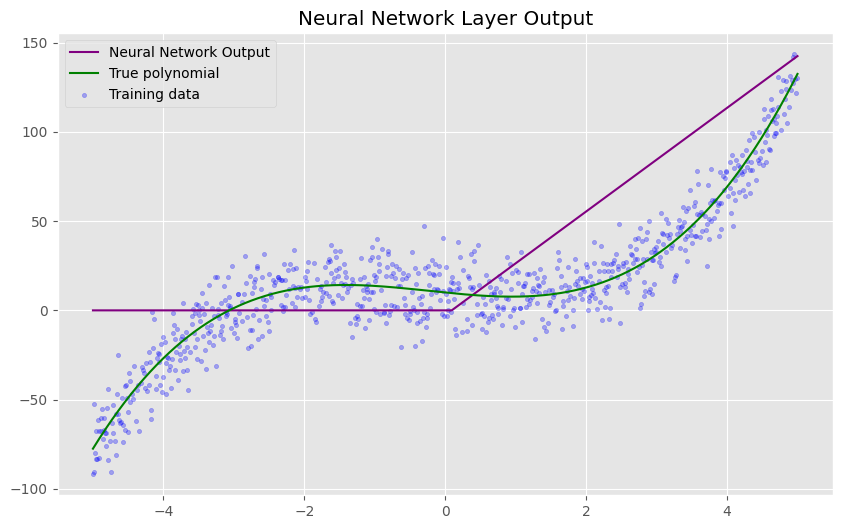

In [5]:
np.random.seed(0)


def relu(x):
    return np.maximum(0, x)


# frst layer
l1 = xx.reshape(-1, 1)

# second layer
w2 = 10 * np.random.normal(0, 1, size=(1, 2))
b2 = 10 * np.random.normal(0, 1, size=(2,))
l2 = relu(l1 @ w2 + b2)

# third layer
w3 = np.random.normal(0, 1, size=(2, 1))
b3 = np.random.normal(0, 1, size=(1,))
l3 = relu(l2 @ w3 + b3)  # this is the output of the network

print("l1 shape:", l1.shape)
print("l2 shape:", l2.shape)
print("l3 shape:", l3.shape)

plt.figure(figsize=(10, 6))
plt.plot(xx, l3, color="purple", label="Neural Network Output")
plt.plot(xx, p(xx), color="green", label="True polynomial")
plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.3, marker="."
)
plt.title("Neural Network Layer Output")
plt.legend()
plt.show()

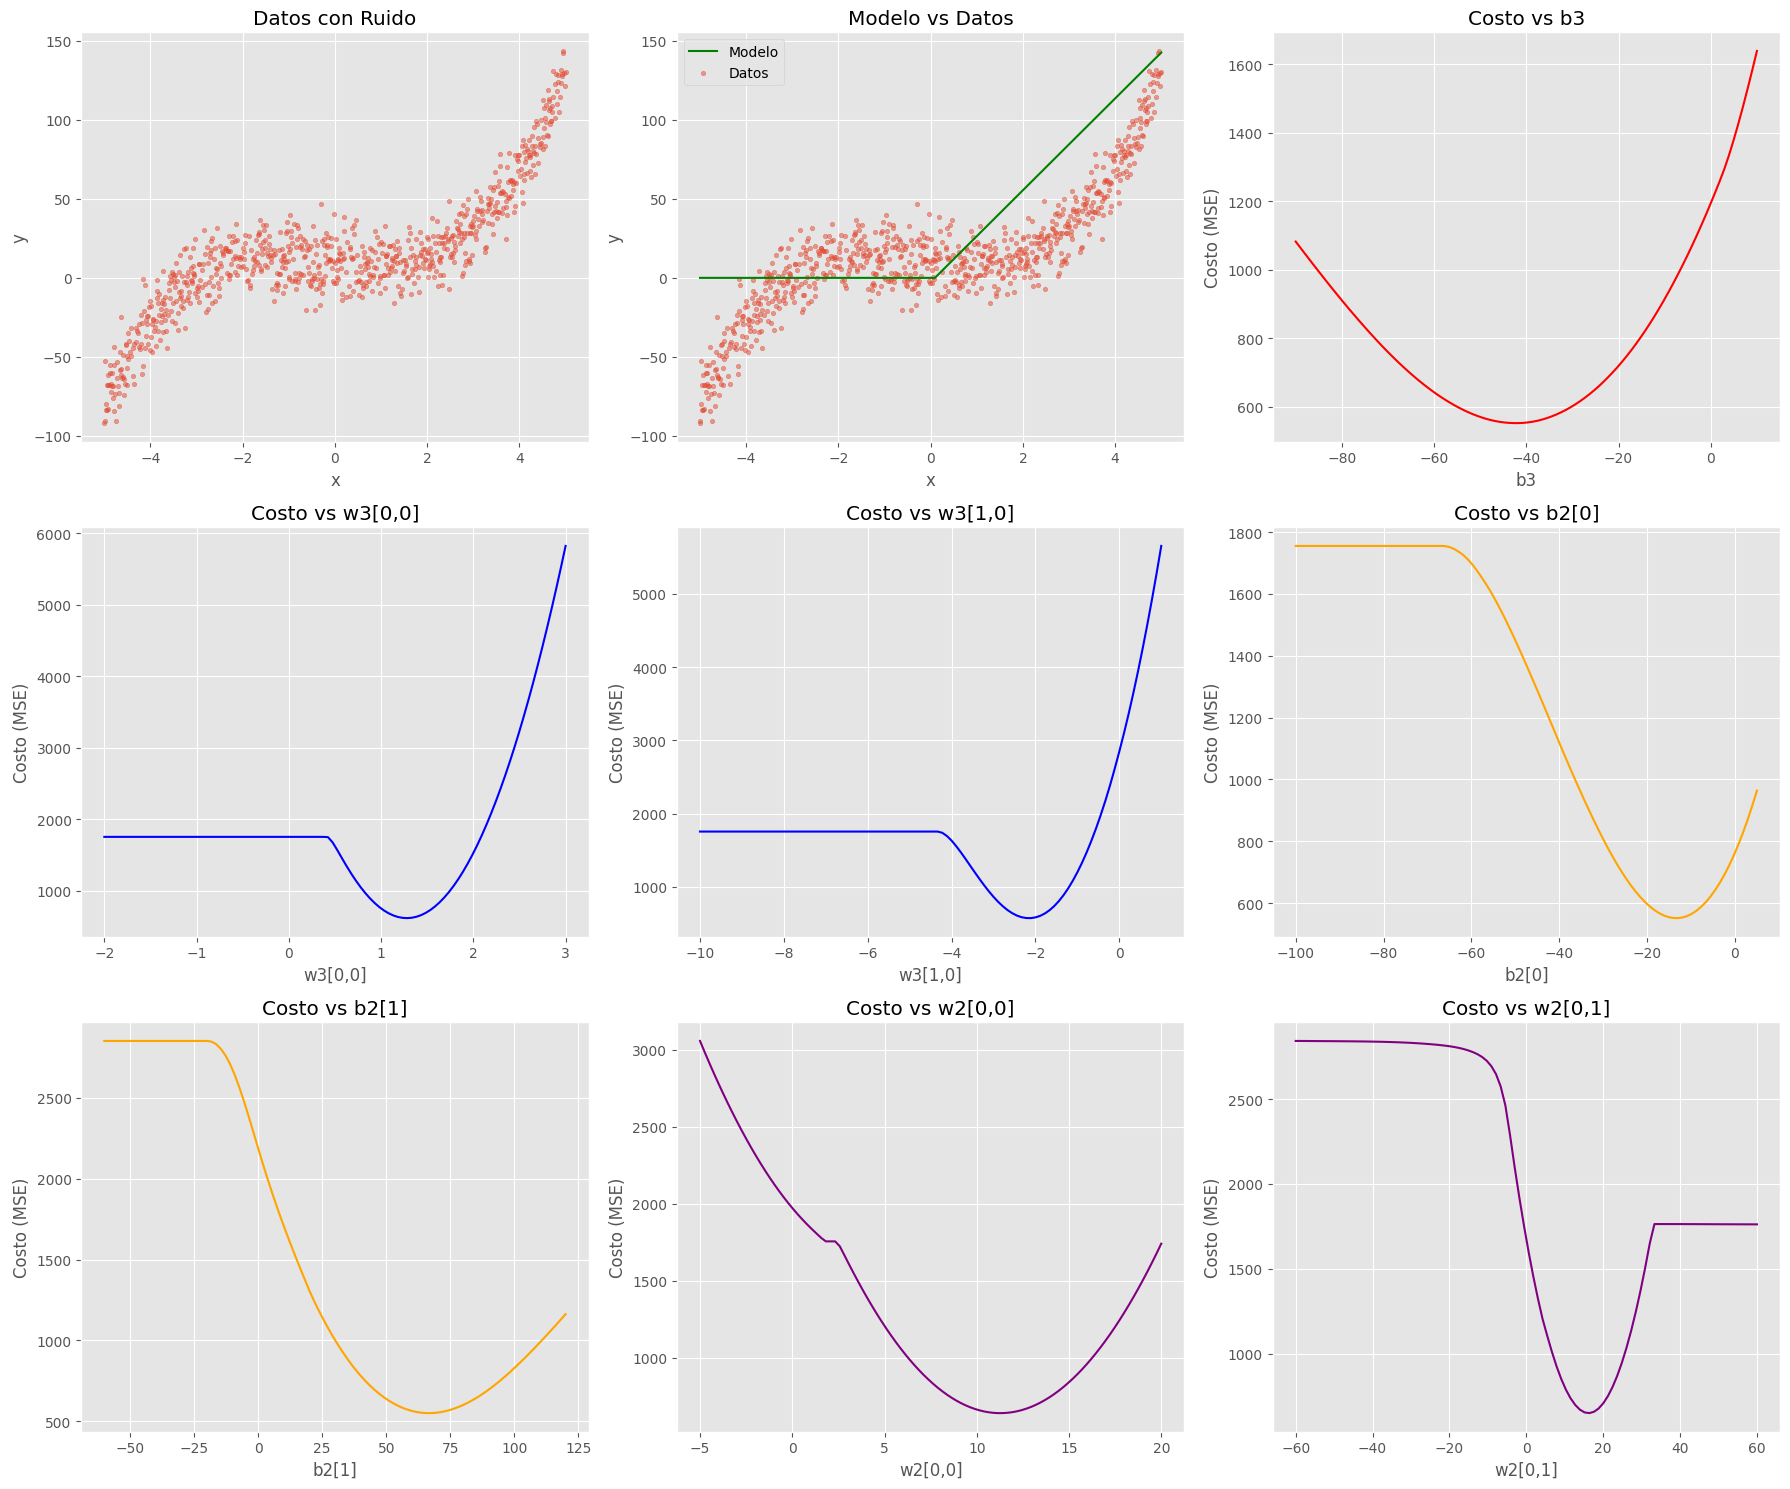

In [6]:
def cost(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# 1. Data
axes[0, 0].scatter(X_train, y_train, alpha=0.5, s=10, label="Datos")
axes[0, 0].set_title("Datos con Ruido")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")

# 2. Model vs Data
axes[0, 1].plot(xx, l3, color="green", label="Modelo")
axes[0, 1].scatter(X_train, y_train, alpha=0.5, s=10, label="Datos")
axes[0, 1].set_title("Modelo vs Datos")
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("y")
axes[0, 1].legend()

l1_train = X_train.reshape(-1, 1)
# Precompute l2 for w3/b3 plots where w2/b2 are fixed
l2_train = relu(l1_train @ w2 + b2)

# 3. Cost vs b3
b3_vals = np.linspace(-90, 10, 100)
costs = []
for val in b3_vals:
    # b3 is shape (1,)
    pred = relu(l2_train @ w3 + val).flatten()
    costs.append(cost(y_train, pred))
axes[0, 2].plot(b3_vals, costs, color="red")
axes[0, 2].set_title("Costo vs b3")
axes[0, 2].set_xlabel("b3")
axes[0, 2].set_ylabel("Costo (MSE)")

# 4. Cost vs w3[0, 0]
w3_00_vals = np.linspace(-2, 3, 100)
costs = []
for val in w3_00_vals:
    w3_temp = w3.copy()
    w3_temp[0, 0] = val
    pred = relu(l2_train @ w3_temp + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 0].plot(w3_00_vals, costs, color="blue")
axes[1, 0].set_title("Costo vs w3[0,0]")
axes[1, 0].set_xlabel("w3[0,0]")
axes[1, 0].set_ylabel("Costo (MSE)")

# 5. Cost vs w3[1, 0]
w3_10_vals = np.linspace(-10, 1, 100)
costs = []
for val in w3_10_vals:
    w3_temp = w3.copy()
    w3_temp[1, 0] = val
    pred = relu(l2_train @ w3_temp + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 1].plot(w3_10_vals, costs, color="blue")
axes[1, 1].set_title("Costo vs w3[1,0]")
axes[1, 1].set_xlabel("w3[1,0]")
axes[1, 1].set_ylabel("Costo (MSE)")

# For w2 and b2, we need to recompute l2_train inside the loop

# 6. Cost vs b2[0]
b2_0_vals = np.linspace(-100, 5, 100)
costs = []
for val in b2_0_vals:
    b2_temp = b2.copy()
    b2_temp[0] = val
    l2_temp = relu(l1_train @ w2 + b2_temp)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[1, 2].plot(b2_0_vals, costs, color="orange")
axes[1, 2].set_title("Costo vs b2[0]")
axes[1, 2].set_xlabel("b2[0]")
axes[1, 2].set_ylabel("Costo (MSE)")

# 7. Cost vs b2[1]
b2_1_vals = np.linspace(-60, 120, 100)
costs = []
for val in b2_1_vals:
    b2_temp = b2.copy()
    b2_temp[1] = val
    l2_temp = relu(l1_train @ w2 + b2_temp)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 0].plot(b2_1_vals, costs, color="orange")
axes[2, 0].set_title("Costo vs b2[1]")
axes[2, 0].set_xlabel("b2[1]")
axes[2, 0].set_ylabel("Costo (MSE)")

# 8. Cost vs w2[0, 0]
w2_00_vals = np.linspace(-5, 20, 100)
costs = []
for val in w2_00_vals:
    w2_temp = w2.copy()
    w2_temp[0, 0] = val
    l2_temp = relu(l1_train @ w2_temp + b2)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 1].plot(w2_00_vals, costs, color="purple")
axes[2, 1].set_title("Costo vs w2[0,0]")
axes[2, 1].set_xlabel("w2[0,0]")
axes[2, 1].set_ylabel("Costo (MSE)")

# 9. Cost vs w2[0, 1]
w2_01_vals = np.linspace(-60, 60, 100)
costs = []
for val in w2_01_vals:
    w2_temp = w2.copy()
    w2_temp[0, 1] = val
    l2_temp = relu(l1_train @ w2_temp + b2)
    pred = relu(l2_temp @ w3 + b3).flatten()
    costs.append(cost(y_train, pred))
axes[2, 2].plot(w2_01_vals, costs, color="purple")
axes[2, 2].set_title("Costo vs w2[0,1]")
axes[2, 2].set_xlabel("w2[0,1]")
axes[2, 2].set_ylabel("Costo (MSE)")

plt.tight_layout()
plt.show()

## **Gradient Descent and Backpropagation**

Now we will implement the training loop. We will:

1. Initialize the weights and biases.
2. Perform the forward pass (using ReLU for the hidden layer and Linear activation for the output layer, as described in the architecture section).
3. Compute the Mean Squared Error (MSE) loss.
4. Compute gradients using backpropagation.
5. Update parameters using Gradient Descent.


In [7]:
# Hyperparameters
learning_rate = 0.001
epochs = 5000

# Prepare training data
X = X_train.reshape(-1, 1)
y = y_train.reshape(-1, 1)
m = X.shape[0]

# Initialize parameters randomly
np.random.seed(42)
w2 = np.random.randn(1, 2) * 0.1
b2 = np.random.randn(2) * 0.1
w3 = np.random.randn(2, 1) * 0.1
b3 = np.random.randn(1) * 0.1

loss_history = []

print("Starting training...")

for epoch in range(epochs):
    # --- Forward Pass ---
    # Layer 2 (Hidden)
    z2 = X @ w2 + b2
    a2 = relu(z2)  # ReLU activation

    # Layer 3 (Output)
    z3 = a2 @ w3 + b3
    y_pred = z3  # no activation at the output layer

    # --- Loss (MSE) ---
    loss = cost(y, y_pred)
    loss_history.append(loss)

    # --- Backpropagation ---
    # Gradient of Loss w.r.t y_pred
    # J = (1/m) * sum((y - y_pred)^2) -> dJ/dy_pred = (2/m) * (y_pred - y)
    dy_pred = (2 / m) * (y_pred - y)

    # Gradients for Layer 3 (Output)
    # z3 = a2 @ w3 + b3
    dw3 = a2.T @ dy_pred
    db3 = np.sum(dy_pred, axis=0)

    # Gradients for Layer 2 (Hidden)
    # da2 = dy_pred @ w3.T
    da2 = dy_pred @ w3.T
    # Derivative of ReLU: 1 if z2 > 0 else 0
    dz2 = da2 * (z2 > 0)

    dw2 = X.T @ dz2
    db2 = np.sum(dz2, axis=0)

    # --- Gradient Descent Update ---
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print(f"Final Loss: {loss:.4f}")

Starting training...
Epoch 0: Loss = 1750.8245
Epoch 500: Loss = 271.1838
Epoch 1000: Loss = 183.3664
Epoch 1500: Loss = 165.1433
Epoch 2000: Loss = 160.4177
Epoch 2500: Loss = 158.7540
Epoch 3000: Loss = 158.0342
Epoch 3500: Loss = 157.8049
Epoch 4000: Loss = 157.6990
Epoch 4500: Loss = 157.6536
Final Loss: 157.6392


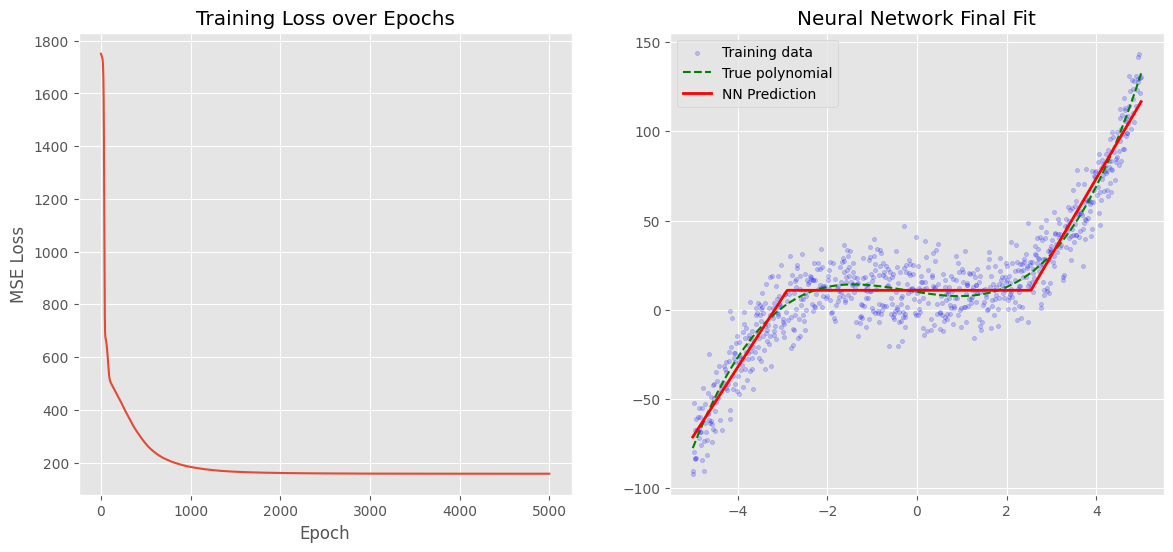

Learned Parameters:
w2: [ 3.97 -3.57]
b2: [-10.09 -10.33]
w3: [ 10.84 -10.93]
b3: [10.93]


In [8]:
# Visualization
plt.figure(figsize=(14, 6))

# Plot Loss History
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# Plot Final Fit
plt.subplot(1, 2, 2)
# Forward pass on the full domain xx for visualization
l1_plot = xx.reshape(-1, 1)
l2_plot = relu(l1_plot @ w2 + b2)
l3_plot = l2_plot @ w3 + b3

plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.2, marker="."
)
plt.plot(xx, p(xx), color="green", label="True polynomial", linestyle="--")
plt.plot(xx, l3_plot, color="red", label="NN Prediction", linewidth=2)
plt.title("Neural Network Final Fit")
plt.legend()
plt.grid(True)

plt.show()

print("Learned Parameters:")
print(f"w2: {w2.flatten()}")
print(f"b2: {b2}")
print(f"w3: {w3.flatten()}")
print(f"b3: {b3}")

## **PyTorch-like OOP Implementation**

To better understand how deep learning libraries like PyTorch work under the hood, we will refactor our code into an Object-Oriented structure. We will define:

1.  **`Module`**: A base class for all layers.
2.  **`Linear`**: A layer that performs the linear transformation $z = xW + b$. It will store gradients for $W$ and $b$ during the backward pass.
3.  **`ReLU`**: An activation layer.
4.  **`MSELoss`**: A class to compute the loss and its gradient.
5.  **`SGD`**: An optimizer to update the parameters.

Each layer will have a `forward` method to compute the output and cache necessary values, and a `backward` method to compute gradients and propagate the error to the previous layer.


In [9]:
class Module:
    def forward(self, x):
        raise NotImplementedError

    def backward(self, grad):
        raise NotImplementedError

    def __call__(self, x):
        return self.forward(x)


class Linear(Module):
    def __init__(self, input_dim, output_dim):
        # Initialize weights and biases
        np.random.seed(42)  # For reproducibility
        self.w = np.random.randn(input_dim, output_dim) * 0.1
        self.b = np.random.randn(output_dim) * 0.1
        self.dw = None
        self.db = None
        self.x = None  # To cache input for backward pass

    def forward(self, x):
        self.x = x
        return x @ self.w + self.b

    def backward(self, grad):
        # grad is dL/dY (gradient from the next layer)

        # Compute gradients for parameters
        # dL/dW = X.T @ dL/dY
        self.dw = self.x.T @ grad
        # dL/db = sum(dL/dY)
        self.db = np.sum(grad, axis=0)

        # Compute gradient for input to propagate back
        # dL/dX = dL/dY @ W.T
        return grad @ self.w.T


class ReLU(Module):
    def __init__(self):
        self.x = None

    def forward(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, grad):
        # Derivative of ReLU is 1 if x > 0 else 0
        return grad * (self.x > 0)


class MSELoss:
    def __init__(self):
        self.y_pred = None
        self.y_true = None

    def forward(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        return np.mean((y_true - y_pred) ** 2)

    def backward(self):
        # Gradient of MSE w.r.t prediction
        n = self.y_true.shape[0]
        return (2.0 / n) * (self.y_pred - self.y_true)


class SGD:
    def __init__(self, lr=0.001):
        self.lr = lr

    def step(self, modules):
        for m in modules:
            if isinstance(m, Linear):
                m.w -= self.lr * m.dw
                m.b -= self.lr * m.db

In [10]:
# --- Training Configuration ---
epochs = 5000
learning_rate = 0.001

# Define the model as a list of layers (Sequential)
model = [
    Linear(1, 2),  # Input: 1 -> Hidden: 2
    ReLU(),  # Activation
    Linear(2, 1),  # Hidden: 2 -> Output: 1
]

loss_fn = MSELoss()
optimizer = SGD(lr=learning_rate)

loss_history_oop = []

print("Starting OOP Training...")

for epoch in range(epochs):
    # 1. Forward Pass
    x_val = X
    for layer in model:
        x_val = layer(x_val)
    y_pred = x_val

    # 2. Compute Loss
    loss = loss_fn.forward(y, y_pred)
    loss_history_oop.append(loss)

    # 3. Backward Pass
    grad = loss_fn.backward()
    for layer in reversed(model):
        grad = layer.backward(grad)

    # 4. Update Parameters
    optimizer.step(model)

    if epoch % 500 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print(f"Final Loss: {loss:.4f}")

Starting OOP Training...
Epoch 0: Loss = 1752.8820
Epoch 500: Loss = 275.5454
Epoch 1000: Loss = 185.0430
Epoch 1500: Loss = 165.7515
Epoch 2000: Loss = 160.6511
Epoch 2500: Loss = 158.8605
Epoch 3000: Loss = 158.0709
Epoch 3500: Loss = 157.8180
Epoch 4000: Loss = 157.7076
Epoch 4000: Loss = 157.7076
Epoch 4500: Loss = 157.6560
Final Loss: 157.6400
Epoch 4500: Loss = 157.6560
Final Loss: 157.6400


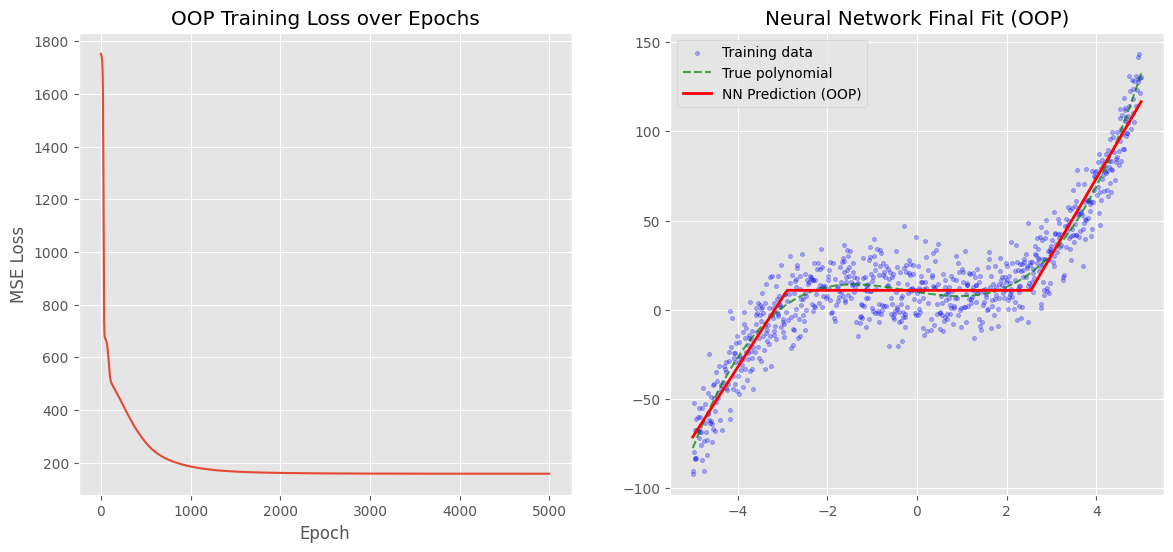

In [11]:
# Visualization of OOP Results
plt.figure(figsize=(14, 6))

# Plot Loss History
plt.subplot(1, 2, 1)
plt.plot(loss_history_oop)
plt.title("OOP Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)

# Plot Final Fit
plt.subplot(1, 2, 2)
# Forward pass for visualization
x_plot = xx.reshape(-1, 1)
for layer in model:
    x_plot = layer(x_plot)
y_plot = x_plot

plt.scatter(
    X_train, y_train, color="blue", label="Training data", alpha=0.3, marker="."
)
plt.plot(xx, p(xx), color="green", label="True polynomial", linestyle="--", alpha=0.7)
plt.plot(xx, y_plot, color="red", label="NN Prediction (OOP)", linewidth=2)
plt.title("Neural Network Final Fit (OOP)")
plt.legend()
plt.grid(True)

plt.show()